In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Data Cleaning


In [2]:
data = pd.read_csv('spotify_unique_ver4.csv')

tem = []
for i in range(data.shape[0]):
    tem.append(data['release_date'][i].split('-')[0])
data['release_date'] = tem

data = data[data['release_date']!='2020']

In [3]:

def as_feature_pop(data,popularity = 70):
    return data[data['popularity'] > popularity].loc[:,['danceability','acousticness', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence','key','loudness','tempo','mode', 'artist_popularity']] 
def as_feature_unpop(data,popularity = 30):
    return data[data['popularity'] < popularity].loc[:,['danceability','acousticness', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence','key','loudness','tempo','mode', 'artist_popularity']]  


In [5]:
year = [str(i) for i in range(2019 , 2001, -1)]

In [8]:
def get_year_data(data , number):
    return data[data['release_date']== str(number) ]

In [9]:
datas = {y :get_year_data(data, y) for y in year }

In [10]:
data_features_p = {i : as_feature_pop( datas[i] ,datas[i]['popularity'].describe()['75%']) for i in datas}
data_features_up = {i : as_feature_unpop( datas[i] ,datas[i]['popularity'].describe()['25%']) for i in datas}

In [18]:
def plot_histogram(start_year = 2016 , end_year = 2019, data = data_features_p):
    years = []
    for i in range(start_year , end_year +1):
        years.append(str(i))
    plt.subplot(2,2,1)
    plt.hist(data[years[0]]['artist_popularity'], bins=10, normed=0, facecolor="blue", edgecolor="black", alpha=0.7)
    plt.subplot(2,2,2)
    plt.hist(data[years[1]]['artist_popularity'], bins=10, normed=0, facecolor="blue", edgecolor="black", alpha=0.7)
    plt.subplot(2,2,3)
    plt.hist(data[years[2]]['artist_popularity'], bins=10, normed=0, facecolor="blue", edgecolor="black", alpha=0.7)
    plt.subplot(2,2,4)
    plt.hist(data[years[3]]['artist_popularity'], bins=10, normed=0, facecolor="blue", edgecolor="black", alpha=0.7)
    
    

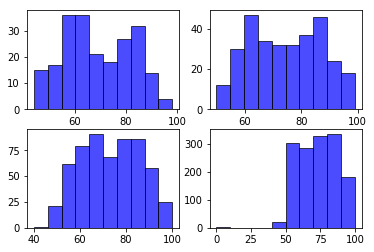

In [19]:
plot_histogram(start_year = 2016 , end_year = 2019, data = data_features_p)